聚类和分类的不同

聚类分析

簇识别

## K均值聚类算法

优点：容易实现

缺点：可能收敛到局部最小值，在大规模数据集上收敛较慢

适用数据类型：数值型数据

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
def loadData(fileName):  # 将文本处理成所需要的数据样式
    dataMat = []
    file = open(fileName)
    for line in file.readlines():
        curLine = line.strip().split('\t')
        #print(curLine)
        floatLine = list(map(float, curLine))
        #print(floatLine)
        dataMat.append(floatLine)
    return dataMat

In [41]:
def distance(A, B):      # 计算出聚类中心和各个点的距离
    return np.sqrt(np.sum(np.power(A-B, 2)))

In [42]:
x = np.array([2,3])
y = np.array([1,1])
distance(x,y)

2.23606797749979

In [43]:
def randcent(dataSet, k):   ## 找到簇的质心
    n = dataSet.shape[1]
    centroids = np.mat(np.zeros((k, n)))
    for j in range(n):
        minJ = np.min(dataSet[:,j])
        rangeJ = float(np.max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k, 1)
    return centroids
    

In [44]:
dataMat = np.mat(loadData("F:/ziliao/machinelearninginaction-master/Ch10/testSet.txt"))

In [45]:
dataMat[:5,:]

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086]])

In [46]:
np.min(dataMat[:,0])

-5.379713

In [47]:
np.min(dataMat[:,1])

-4.232586

In [48]:
np.max(dataMat[:,0])

4.838138

In [49]:
np.max(dataMat[:,1])

5.1904

In [50]:
randcent(dataMat, 3)

matrix([[-2.35896642, -2.34440843],
        [-1.4628287 ,  2.86274498],
        [-1.95885889, -0.76994933]])

In [51]:
distance(dataMat[0], dataMat[1])

5.184632816681332

In [52]:
distance(dataMat[0], dataMat[1])

5.184632816681332

In [53]:
def kMeans(dataSet, k, disMethod=distance, createCent=randcent):## K均值聚类算法
    m = dataSet.shape[0]  ## 取出样本数
    clusterAssment = np.mat(np.zeros((m,2))) ## 生成用来存储索引和距离平方值的矩阵
    centroids = createCent(dataSet, k) ## 随机生成K个聚类中心
    clusterChanged = True  ## 控制运行的开关
    while clusterChanged:  ## 开关为true 则运行，否则收敛结束
        clusterChanged = False  ## 循环开始先将开关关闭
        for i in range(m):      
            minDist = float('inf')  ## 初始化最小距离
            #print(minDist)
            minIndex = -1   ## 初始化最小索引
            for j in range(k):  ## K个
                distJ = disMethod(centroids[j,:],dataSet[i,:])  ## 计算K个聚类中心和各个样本之间的距离
                #print(distJ)
                if distJ < minDist:
                    minDist = distJ
                    minIndex = j
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex, minDist**2
        print(centroids)
        for cent in range(k):
            pinCluster = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]] ## 返回数组a中非零（true）元素的索引值数组
            centroids[cent,:] = np.mean(pinCluster, axis = 0)
    return centroids,clusterAssment

In [89]:
dataMat2 = np.mat(loadData("F:/ziliao/machinelearninginaction-master/Ch10/testSet.txt"))
dataArray = np.array(loadData("F:/ziliao/machinelearninginaction-master/Ch10/testSet.txt"))
myCentroids,myclusterAssment = kMeans(dataMat2,4)

[[-5.0179676   0.75520728]
 [-1.69932958  4.64682663]
 [ 4.29820078 -0.91335871]
 [ 3.59161795  1.22120589]]
[[-3.54251791 -2.066412  ]
 [-1.74777617  3.20930561]
 [ 2.7481024  -2.90572575]
 [ 2.61509358  2.74834663]]
[[-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]
 [ 2.65077367 -2.79019029]
 [ 2.6265299   3.10868015]]


In [56]:
myCentroidsArray = np.asarray(myCentroids)

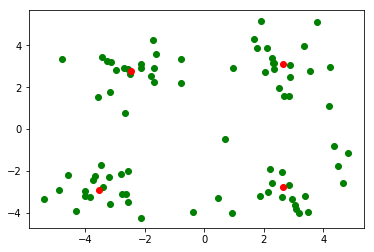

In [57]:
##  散点图
plt.scatter(dataArray[:,0],dataArray[:,1],c='green')
plt.scatter(myCentroidsArray[:,0],myCentroidsArray[:,1],c='red')
plt.show()

In [58]:
def showCluster(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape
    if dim != 2:
        print("Sorry! I can not draw because the dimension of your data is not 2!")
        return 1
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr'] 
    mark2 = ['Dr','Db','Dg','Dk','^b','+b','sb','db','<b','pb']
    if k > len(mark):
        print("Sorry! Your k is too large! please contact Zouxy")
        return 1
    # draw all samples 
    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataSet[i,0], dataSet[i,1], mark[markIndex])
   
    # 画出聚类中心
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],mark2[i],markersize=15)
    plt.show()

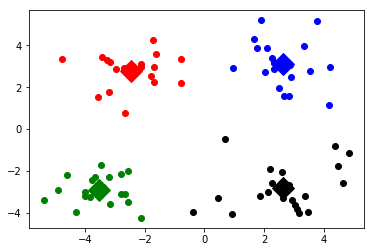

In [59]:
showCluster(dataArray,4,myCentroidsArray,myclusterAssment)

# 使用后处理来提高聚类处理

簇的数目K是一个用户预先定义的参数,如何知道K的选择是否正确？

K均值算法收敛但聚类效果较差的原因？ 收敛到了局部最小值

SSE? 越小表示数据点越接近聚类中心。


# 二分K均值聚类算法

为克服K-均值算法收敛与局部最小值的问题

In [60]:
np.mean(dataMat2, axis=0).tolist()[0]

[-0.10361321250000004, 0.05430119999999998]

In [61]:
a=np.mat([[1,2,3],[4,5,6]])
b=a.A
print(type(a))
print(type(b))
print(b)

<class 'numpy.matrixlib.defmatrix.matrix'>
<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]


In [93]:
def biKmeans(dataSet, k, disMethod=distance):
    m = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    # print(clusterAssment)
    centroid0 = np.mean(dataSet, axis=0).tolist()[0] ## tolist矩阵到列表
    centList = [centroid0]   # 创建初始簇
    # print(centroid0)
    for j in range(m):
        clusterAssment[j,1] = disMethod(np.mat(centroid0), dataSet[j,:])**2
    while (len(centList)<k): ## 当簇的个数小于K
        lowestSSE = float('inf')  ## 初始最小的SSE
        for i in range(len(centList)):
            # 提取编号为i的数据形成一个新的数据集
            pInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]
            # print("np.nonzero(clusterAssment[:,0]:",np.nonzero(clusterAssment[:,0].A==i)[0])
            # print("pInCurrCluster:",pInCurrCluster)
            # mat.A 将矩阵转化为array数组的形式； 取出簇索引与当前簇类编号相同的数据                
            centroidMat,splitClustAss = kMeans(pInCurrCluster,2,disMethod)
            # 尝试去分每一簇 centroidMat（质心） splitClustAss（簇分配结果）
            sseSplit = np.sum(splitClustAss[:,1]) ### 从分配结果中求出对应的SSE之和
            sseNotSplit =np.sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            # 求出不是当前分类簇的SSE之和
            #print("haha:",clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("ssesplt和seNotSplit",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit)<lowestSSE:
                bestCentToSplit = i               
                bestNewCents = centroidMat          # 用新的聚类中心更新最优聚类中心
                bestClustAss = splitClustAss.copy()  
                lowestSSE = sseSplit + sseNotSplit
        """更新簇的分配结果"""
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0], 0] = len(centList) 
        # print(len(centList))
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0], 0] = bestCentToSplit
        """输出最好分类"""
        print("bestCentToSplit:",bestCentToSplit)
        print("len(bestClustAss):",len(bestClustAss))
        
        showCluster(dataSet,len(centList),np.mat(centList),clusterAssment)
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]
        
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]=bestClustAss
        
    showCluster(dataSet,len(centList),np.mat(centList),clusterAssment)
    return np.mat(centList),clusterAssment

In [94]:
dataMat3 = np.mat(loadData("F:/ziliao/machinelearninginaction-master/Ch10/testSet.txt"))

[[ 2.1187139   4.7857297 ]
 [-2.67351834  4.65703747]]
[[ 2.71473038  0.18858278]
 [-2.9219568  -0.07998038]]
ssesplt和seNotSplit 828.6926539968681 0.0
bestCentToSplit: 0
len(bestClustAss): 80


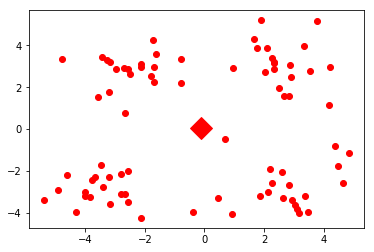

[[3.75748592 4.94063759]
 [2.64019908 0.45639861]]
[[ 2.67424467  3.74089642]
 [ 2.73208139 -1.33383736]]
[[ 2.54391447  3.21299611]
 [ 2.8692781  -2.54779119]]
[[ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]]
ssesplt和seNotSplit 87.30471264989171 399.99802121609173
[[-2.43573037  3.87530003]
 [-2.13645765  2.14862906]]
[[-2.619888    3.43727037]
 [-2.997474   -0.95929306]]
[[-2.45009747  2.89275747]
 [-3.34887714 -2.76960033]]
[[-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]]
ssesplt和seNotSplit 62.64959202653465 428.6946327807764
bestCentToSplit: 0
len(bestClustAss): 40


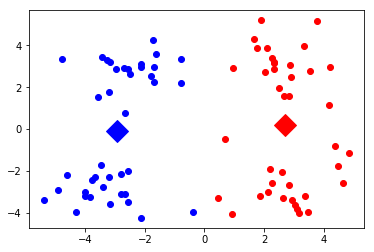

[[1.9455188  1.3633801 ]
 [2.66629972 2.38685701]]
[[2.668759   1.594842  ]
 [2.62430732 3.18835584]]
[[3.0475435  1.56481175]
 [2.5212765  3.49464725]]
[[3.0168788  1.749675  ]
 [2.4964136  3.56168187]]
[[3.262091   2.073162  ]
 [2.28430469 3.66626685]]
ssesplt和seNotSplit 20.42056248813446 450.98424790755917
[[-4.91116465  0.57203106]
 [-3.82253825  2.90977857]]
[[-3.34887714 -2.76960033]
 [-2.45009747  2.89275747]]
[[-3.38237045 -2.9473363 ]
 [-2.46154315  2.78737555]]
ssesplt和seNotSplit 62.64959202653465 87.30471264989171
[[ 3.58061029 -1.99240361]
 [ 1.2993887  -0.55315714]]
[[ 3.05021133 -2.82492178]
 [ 0.5774065  -1.89085   ]]
[[ 3.17437012 -2.75441347]
 [ 0.69810833 -2.60175433]]
[[ 3.25624481 -2.728045  ]
 [ 0.989675   -2.745393  ]]
ssesplt和seNotSplit 34.545779753738444 436.3165071745162
bestCentToSplit: 1
len(bestClustAss): 40


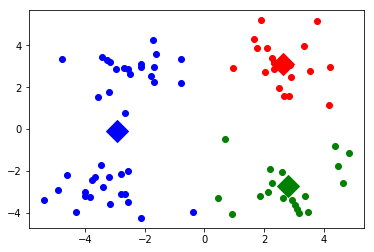

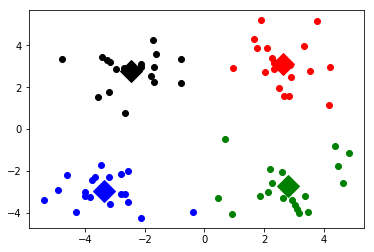

In [95]:
mycentList,myNewAssment = biKmeans(dataMat3,4)

In [85]:
myNewAssment[:10]

matrix([[2.        , 2.20821483],
        [3.        , 1.39004893],
        [1.        , 7.70336226],
        [0.        , 3.39621475],
        [2.        , 2.19939554],
        [3.        , 2.80101213],
        [1.        , 4.85787621],
        [0.        , 1.21637812],
        [2.        , 2.10202436],
        [3.        , 0.64596748]])

In [86]:
biDataArray = np.asarray(dataMat3)
mybiCentroidsArray = np.asarray(mycentList)
mycentList

matrix([[-3.61853111, -2.81946867],
        [ 2.59258145, -2.78274655],
        [ 2.4519287 ,  3.02837225],
        [-2.46154315,  2.78737555]])

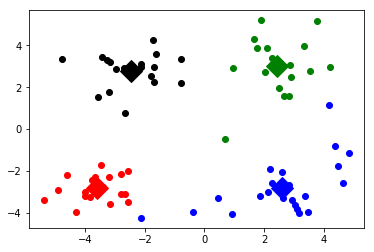

In [88]:
showCluster(biDataArray,4,mybiCentroidsArray,myNewAssment)

# 使用scikit-learn中的K-means方法

In [68]:
from  sklearn.cluster import k_means

In [69]:
help(k_means)

Help on function k_means in module sklearn.cluster.k_means_:

k_means(X, n_clusters, init='k-means++', precompute_distances='auto', n_init=10, max_iter=300, verbose=False, tol=0.0001, random_state=None, copy_x=True, n_jobs=1, algorithm='auto', return_n_iter=False)
    K-means clustering algorithm.
    
    Read more in the :ref:`User Guide <k_means>`.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        The observations to cluster.
    
    n_clusters : int
        The number of clusters to form as well as the number of
        centroids to generate.
    
    init : {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++':
    
        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.
    
        'random': generate k centroids from a Gaussian with me

In [70]:
mycent, mylabel, myinertia= k_means(dataMat2,4) ## myinertia SSE的最终值（训练集中所有观测值与最近质心的平方距离之和）。
print(mycent)
print(mylabel)
print(myinertia)

[[ 2.80293085 -2.7315146 ]
 [ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [-2.46154315  2.78737555]]
[1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1
 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 0 2 1 3 0 2]
149.95430467642635


# 示例：对地图上的点进行聚类

In [71]:
#Yahoo！PlaceFinder API
#导入urllib
import urllib
#导入json模块
import json

#利用地名，城市获取位置经纬度函数
def geoGrab(stAddress,city):
    #获取经纬度网址
    apiStem='http://where.yahooapis.com/geocode?'
    #初始化一个字典，存储相关参数
    params={}
    #返回类型为json
    params['flags']='J'
    #参数appid
    params['appid']='ppp68N8t'
    #参数地址位置信息
    params['location']=('%s %s'%(stAddress,city))
    #利用urlencode函数将字典转为URL可以传递的字符串格式
    url_params=urllib.parse.urlencode(params)
    #组成完整的URL地址api
    yahooApi=apiStem+url_params
    #打印该URL地址
    print('%s',yahooApi)
    #打开URL，返回json格式的数据
    c=urllib.parse.urlencode(yahooApi)
    #返回json解析后的数据字典
    return json.load(c.read())

from time import sleep
#具体文本数据批量地址经纬度获取函数
def massPlaceFind(fileName):
    #新建一个可写的文本文件，存储地址，城市，经纬度等信息
    fw=open('places.txt','wb+')
    #遍历文本的每一行
    for line in open(fileName).readlines():
        #去除首尾空格
        line =line.strip()
        #按tab键分隔开
        lineArr=line.split('\t')
        #利用获取经纬度函数获取该地址经纬度
        retDict=geoGrab(lineArr[1],lineArr[2])
        #如果错误编码为0，表示没有错误，获取到相应经纬度
        if retDict['ResultSet']['Error']==0:
            #从字典中获取经度
            lat=float(retDict['ResultSet']['Results'][0]['latitute'])
            #维度
            lng=float(retDict['ResultSet']['Results'][0]['longitute'])
            #打印地名及对应的经纬度信息
            print('%s\t%f\t%f'%(lineArr[0],lat,lng))
            #将上面的信息存入新的文件中
            fw.write('%s\t%f\t%f\n'%(line,lat,lng))
        #如果错误编码不为0，打印提示信息
        else:print('error fetching')
        #为防止频繁调用API，造成请求被封，使函数调用延迟一秒
        sleep(1)
    #文本写入关闭
    fw.close()

In [72]:
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = np.sin(vecA[0,1]*np.pi/180) * np.sin(vecB[0,1]*np.pi/180)
    b = np.cos(vecA[0,1]*np.pi/180) * np.cos(vecB[0,1]*np.pi/180) * np.cos(np.pi * (vecB[0,0]-vecA[0,0]) /180)
    return np.arccos(a + b)*6371.0 #pi is imported with numpy

import matplotlib
import matplotlib.pyplot as plt
def clusterClubs(numClust=5):
    datList = []
    for line in open('F:/ziliao/machinelearninginaction-master/Ch10/places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = np.mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, disMethod=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('F:/ziliao/machinelearninginaction-master/Ch10/Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[np.nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()


[[-122.78844091   45.49943127]
 [-122.79715814   45.53828227]]
[[-122.62767266   45.49194096]
 [-122.64221184   45.56590074]]
[[-122.62764833   45.49111473]
 [-122.6415445    45.564227  ]]
[[-122.62667296   45.49041521]
 [-122.64311219   45.56234438]]
[[-122.62461709   45.48898839]
 [-122.64579443   45.5589433 ]]
[[-122.61634839   45.48537571]
 [-122.6541205    45.55174136]]
[[-122.59138469   45.48359997]
 [-122.67315276   45.54185774]]
[[-122.57243797   45.49205903]
 [-122.68597792   45.53086706]]
[[-122.56618      45.50641903]
 [-122.70740619   45.51911431]]
[[-122.56409551   45.51016235]
 [-122.70981637   45.51478609]]
ssesplt和seNotSplit 3073.8303715312386 0.0
bestCentToSplit: 0
len(bestClustAss): 69


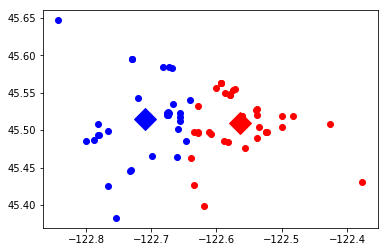

[[-122.60530123   45.47034295]
 [-122.63738773   45.52932683]]
[[-122.55048971   45.4861019 ]
 [-122.58195312   45.54174169]]
[[-122.5466182    45.4855611 ]
 [-122.58465706   45.539105  ]]
[[-122.53852772   45.48428461]
 [-122.58831763   45.53467811]]
[[-122.53441959   45.48363282]
 [-122.58932005   45.53271245]]
ssesplt和seNotSplit 947.1653110010183 1685.0305259845018
[[-122.80228194   45.44953862]
 [-122.76972249   45.59567148]]
[[-122.73900186   45.4701195 ]
 [-122.68711656   45.54952678]]
[[-122.745132     45.46769908]
 [-122.68565305   45.54700353]]
[[-122.75334408   45.46622433]
 [-122.68369975   45.54392315]]
ssesplt和seNotSplit 904.1450176223287 1388.799845546737
bestCentToSplit: 1
len(bestClustAss): 32


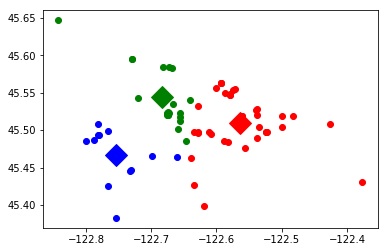

[[-122.43417653   45.56136395]
 [-122.51262716   45.4208514 ]]
[[-122.55228053   45.53730868]
 [-122.57656689   45.48150789]]
[[-122.55507981   45.53549419]
 [-122.57592862   45.47691431]]
ssesplt和seNotSplit 979.6339852828125 904.1450176223287
[[-122.74413408   45.40734576]
 [-122.66914152   45.46922833]]
[[-122.76199717   45.44543167]
 [-122.744691     45.487017  ]]
[[-122.7458315    45.42503625]
 [-122.75710037   45.48681838]]
ssesplt和seNotSplit 164.05140193628347 2000.9503279693156
[[-122.76518687   45.55871063]
 [-122.68455005   45.52651146]]
[[-122.76690133   45.612314  ]
 [-122.66901712   45.53185418]]
ssesplt和seNotSplit 260.01453591627615 1680.7943807464874
bestCentToSplit: 0
len(bestClustAss): 37


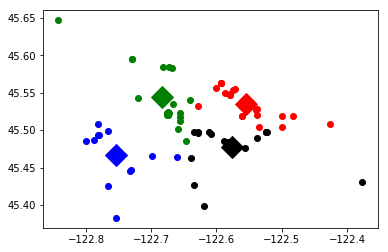

[[-122.50863415   45.55356089]
 [-122.5895351    45.51768771]]
[[-122.497383     45.51742033]
 [-122.57815853   45.54272373]]
[[-122.50707075   45.51609638]
 [-122.58462385   45.54743131]]
ssesplt和seNotSplit 131.8897727338875 1511.054632544769
[[-122.67068398   45.38941551]
 [-122.7127427    45.42185883]]
[[          nan           nan]
 [-122.75334408   45.46622433]]
ssesplt和seNotSplit 291.9945351997503 1591.7844677053913
[[-122.72353951   45.57838818]
 [-122.70902027   45.63554418]]
[[-122.67531984   45.53850695]
 [-122.842918     45.646831  ]]
ssesplt和seNotSplit 312.7539395588533 1271.6285204825629
[[-122.61039095   45.43358135]
 [-122.37997757   45.44110468]]
[[-122.58923693   45.48002067]
 [-122.376304     45.430319  ]]
ssesplt和seNotSplit 319.63899713378487 1276.8693879827013
bestCentToSplit: 2
len(bestClustAss): 20


C:\ProgramData\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:536: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


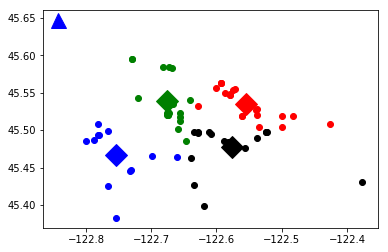

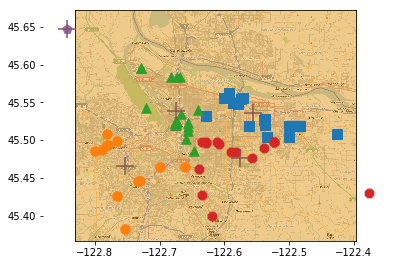

In [73]:
clusterClubs(5)

#  尝试使用SKlearn中的数据集

In [74]:
from sklearn import datasets

iris=datasets.load_iris()###纸鸢花数据集
x=iris.data
y=iris.target

In [75]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [77]:
dataMat4 = np.mat(x)


In [78]:
myCentroids2,myclusterAssment2 = k_means(dataMat4,3)

ValueError: too many values to unpack (expected 2)

In [ ]:
dataArray2 = np.array(x)
myCentroidsArray2 = np.array(myCentroids2)
##  散点图
plt.scatter(dataArray2[:,0],dataArray2[:,1],c='green')
plt.scatter(myCentroidsArray2[:,0],myCentroidsArray2[:,1],c='red')
plt.show()